In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_parquet('rail_data_cleaned_20230728132300.parquet')
dropped = ['working_time_pass', 'pass', 'train_length']
df = df.drop(columns=dropped)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37100 entries, 8 to 94243
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   route_id                37100 non-null  object        
 1   unique_id               37100 non-null  object        
 2   service_start_date      37100 non-null  object        
 3   update_origin           36515 non-null  object        
 4   train_platform          37100 non-null  object        
 5   working_time_arrival    37100 non-null  datetime64[ns]
 6   working_time_departure  37100 non-null  datetime64[ns]
 7   planned_time_arrival    33855 non-null  datetime64[ns]
 8   planned_time_departure  33580 non-null  datetime64[ns]
 9   platform                34114 non-null  object        
 10  actual_arrival_time     31769 non-null  datetime64[ns]
 11  actual_departure_time   34384 non-null  datetime64[ns]
 12  is_delayed_arrival      37100 non-null  bool  

In [40]:
df['actual_arrival_time'] = pd.to_datetime(df['actual_arrival_time'])
df['actual_departure_time'] = pd.to_datetime(df['actual_departure_time'])
df['working_time_arrival'] = pd.to_datetime(df['working_time_arrival'])
df['working_time_departure'] = pd.to_datetime(df['working_time_departure'])
df['planned_time_arrival'] = pd.to_datetime(df['planned_time_arrival'])
df['planned_time_departure'] = pd.to_datetime(df['planned_time_departure'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37100 entries, 8 to 94243
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   route_id                37100 non-null  object        
 1   unique_id               37100 non-null  object        
 2   service_start_date      37100 non-null  object        
 3   update_origin           36515 non-null  object        
 4   train_platform          37100 non-null  object        
 5   working_time_arrival    37100 non-null  datetime64[ns]
 6   working_time_departure  37100 non-null  datetime64[ns]
 7   planned_time_arrival    33855 non-null  datetime64[ns]
 8   planned_time_departure  33580 non-null  datetime64[ns]
 9   platform                34114 non-null  object        
 10  actual_arrival_time     31769 non-null  datetime64[ns]
 11  actual_departure_time   34384 non-null  datetime64[ns]
 12  is_delayed_arrival      37100 non-null  bool  

In [42]:
df

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,platform,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
8,202307277679020,L79020,2023-07-27,Darwin,STFD,2023-07-27 00:03:00,2023-07-27 00:03:30,NaT,NaT,5,2023-07-27 00:53:00,2023-07-27 00:53:00,True,True
10,202307277679020,L79020,2023-07-27,Darwin,SPNY205,2023-07-27 00:07:00,2023-07-27 00:13:30,NaT,NaT,None,2023-07-27 00:57:00,2023-07-27 00:58:00,True,True
16,202307277679020,L79020,2023-07-27,Darwin,PADTLL,2023-07-27 00:30:30,2023-07-27 00:31:00,NaT,NaT,B,2023-07-27 01:07:00,2023-07-27 01:07:00,True,True
17,202307277679020,L79020,2023-07-27,Darwin,WBRNPKS,2023-07-27 00:33:00,2023-07-27 00:35:00,NaT,NaT,A,2023-07-27 01:09:00,2023-07-27 01:10:00,True,True
22,202307277674553,L74553,2023-07-27,TD,SVNOAKS,2023-07-27 21:53:00,2023-07-27 21:54:30,2023-07-27 21:53:00,2023-07-27 21:54:00,1,NaT,NaT,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94233,202307278055183,P55183,2023-07-27,Darwin,BRADIN,2023-07-27 17:30:30,2023-07-27 17:33:30,2023-07-27 17:31:00,2023-07-27 17:33:00,4,2023-07-27 18:07:00,2023-07-27 18:08:00,True,True
94235,202307278055183,P55183,2023-07-27,Darwin,HLFX,2023-07-27 17:44:00,2023-07-27 17:45:00,2023-07-27 17:44:00,2023-07-27 17:45:00,1,2023-07-27 18:18:00,2023-07-27 18:19:00,True,True
94238,202307278055183,P55183,2023-07-27,Darwin,HBDNBDG,2023-07-27 17:58:30,2023-07-27 18:01:30,2023-07-27 17:59:00,2023-07-27 18:01:00,1,2023-07-27 18:29:00,2023-07-27 18:30:00,True,True
94240,202307278055183,P55183,2023-07-27,Darwin,TODMRDN,2023-07-27 18:08:30,2023-07-27 18:09:30,2023-07-27 18:09:00,2023-07-27 18:09:00,1,2023-07-27 18:35:00,2023-07-27 18:35:00,True,True


- Which update origin has the most values - the system pushed the most
- Which update origin has the most null time values
- Which routes have the most stops - by unique platform
- How many delays are there vs no delays
- How many marked delays are because of null data
- What is the time between planned times and actual times
- What is the count of delayed arrivals based on the presence of null planned_time_arrival
- What is the count of delayed departures based on the presence of null planned_time_departures
- Which update origin has the most null time values
- Which days have the most stops based on unique platforms


In [67]:
df.groupby('unique_id')['update_origin'].value_counts().agg(sum(axis=1))

TypeError: sum() takes at least 1 positional argument (0 given)

## Which update origin has the most values - the system pushed the most

In [43]:
source_count = df['update_origin'].value_counts()
source_perc = (source_count / df['update_origin'].count()) * 100
source_perc

CIS            39.526222
TD             28.963440
Darwin         24.600849
Trust           6.033137
Tyrell          0.799671
Workstation     0.076681
Name: update_origin, dtype: float64

<AxesSubplot:xlabel='update_origin', ylabel='count'>

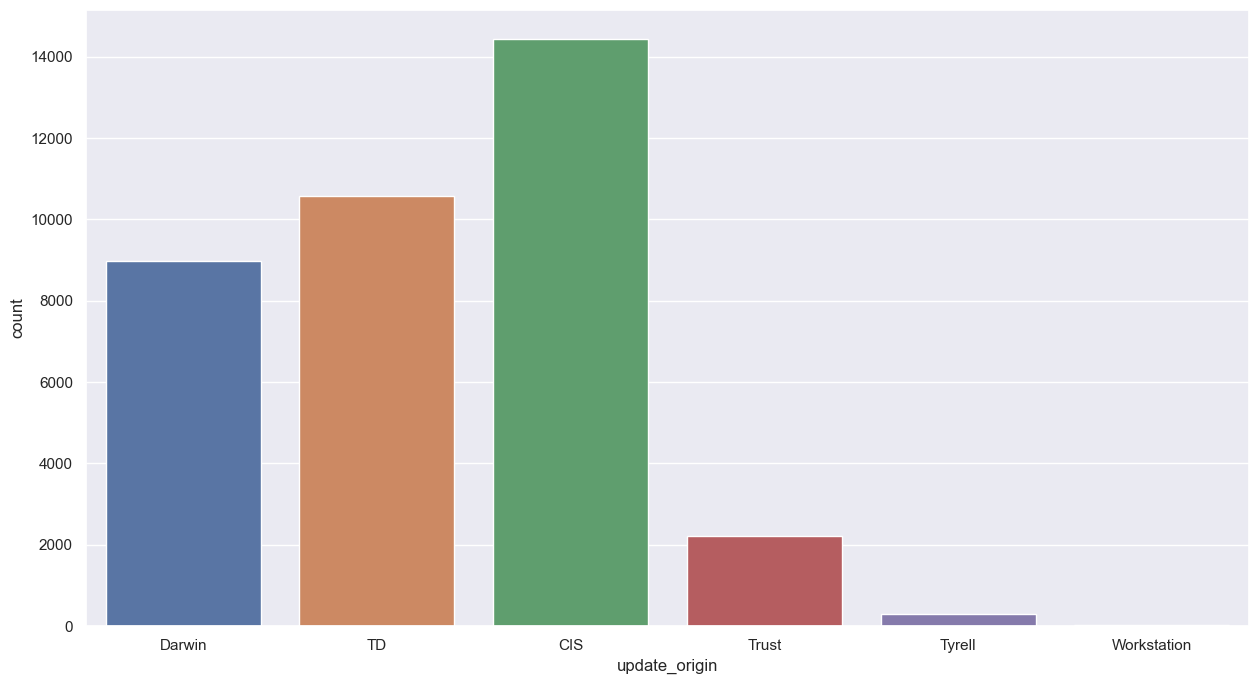

In [44]:
sns.set(rc = {'figure.figsize': (15,8)})
sns.countplot(x='update_origin', data=df)

## Which update origin has the most null time values

In [45]:
# list of time columns to consider
time_columns = ['planned_time_arrival', 'planned_time_departure', 'actual_arrival_time', 'actual_departure_time']

# initialize a dictionary to store the null counts for each update_origin
null_counts_by_origin = {}

# calculate the null counts for each time column and update_origin
for column in time_columns:
    null_counts_by_origin[column] = df[df[column].isnull()]['update_origin'].value_counts()
    
# combine the null counts from all time columns
combined_null_counts = pd.concat(null_counts_by_origin, axis=1)

# sum the null counts across time columns to get a total null count
combined_null_counts['total_null_count'] = combined_null_counts.sum(axis=1)

# Get the update origin with the most total null time values

    

In [56]:
combined_null_counts.reset_index()

,index,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,total_null_count
0,Darwin,2391,2436,1074,419,6320
1,CIS,356,398,310,195,1259
2,TD,352,517,3171,1647,5687
3,Trust,133,151,605,344,1233
4,Tyrell,4,9,72,77,162


In [71]:
result = df.groupby('update_origin')[['planned_time_arrival', 'planned_time_departure', 'actual_arrival_time', 'actual_departure_time']].count()
print(result)


               planned_time_arrival  planned_time_departure  \
update_origin                                                 
CIS                           14077                   14035   
Darwin                         6592                    6547   
TD                            10224                   10059   
Trust                          2070                    2052   
Tyrell                          288                     283   
Workstation                      28                      28   

               actual_arrival_time  actual_departure_time  
update_origin                                              
CIS                          14123                  14238  
Darwin                        7909                   8564  
TD                            7405                   8929  
Trust                         1598                   1859  
Tyrell                         220                    215  
Workstation                     28                     28  


In [73]:
new_df = result.reset_index()
new_df['total_counts'] = new_df[['planned_time_arrival', 'planned_time_departure', 'actual_arrival_time', 'actual_departure_time']].sum(axis=1)

new_df

,update_origin,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,total_counts
0,CIS,14077,14035,14123,14238,56473
1,Darwin,6592,6547,7909,8564,29612
2,TD,10224,10059,7405,8929,36617
3,Trust,2070,2052,1598,1859,7579
4,Tyrell,288,283,220,215,1006
5,Workstation,28,28,28,28,112


## How many delays are there vs no delays

In [76]:
delayed_counts = df['is_delayed_arrival'].value_counts()
print(delayed_counts)

False    34706
True      2394
Name: is_delayed_arrival, dtype: int64


In [78]:
delayed_counts2 = df['is_delayed_departure'].value_counts()
delayed_counts2

False    34489
True      2611
Name: is_delayed_departure, dtype: int64

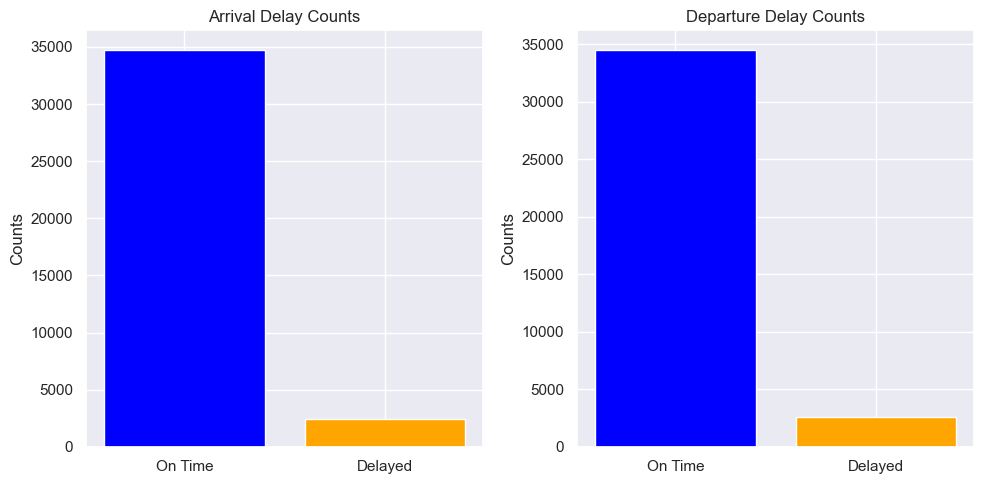

In [87]:


# Assuming you have already calculated delayed_counts and delayed_counts2

# Data
labels = ['On Time', 'Delayed']
counts_arrival = delayed_counts[0], delayed_counts[1]
counts_departure = delayed_counts2[0], delayed_counts2[1]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Bar chart for arrival delays
ax1.bar(labels, counts_arrival, color=['blue', 'orange'])
ax1.set_title('Arrival Delay Counts')
ax1.set_ylabel('Counts')

# Bar chart for departure delays
ax2.bar(labels, counts_departure, color=['blue', 'orange'])
ax2.set_title('Departure Delay Counts')
ax2.set_ylabel('Counts')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [97]:
# Showing how many values in these columns are null

null_counts_actual_arrival = df['actual_arrival_time'].isnull().value_counts()
null_counts_actual_departure = df['actual_departure_time'].isnull().value_counts()

print("Actual Arrival Time:")
print(null_counts_actual_arrival)

print("\nActual Departure Time:")
print(null_counts_planned_arrival)


Actual Arrival Time:
False    31769
True      5331
Name: actual_arrival_time, dtype: int64

Actual Departure Time:
False    33855
True      3245
Name: planned_time_arrival, dtype: int64


In [98]:
null_counts_planned_arrival = df['planned_time_arrival'].isnull().value_counts()
null_counts_planned_departure = df['planned_time_departure'].isnull().value_counts()

print("Planned Arrival Time:")
print(null_counts_actual_arrival)

print("\nPlanned Departure Time:")
print(null_counts_planned_arrival)

Planned Arrival Time:
False    31769
True      5331
Name: actual_arrival_time, dtype: int64

Planned Departure Time:
False    33855
True      3245
Name: planned_time_arrival, dtype: int64


In [100]:
# Calculate the percentage of true delayed arrivals among true null actual arrivals
true_delayed_count = delayed_counts[True]
true_null_planned_arrivals = null_counts_planned_arrival[True]

percentage3 = (true_delayed_count / true_null_planned_arrivals) * 100
print("Percentage of true delayed arrivals among true null planned arrivals:", percentage3, "%")

Percentage of true delayed arrivals among true null planned arrivals: 73.77503852080123 %


In [80]:
# Calculate the percentage of true delayed arrivals among true null actual arrivals
true_delayed_count = delayed_counts[True]
true_null_actual_arrivals = null_counts_actual_arrival[True]

percentage = (true_delayed_count / true_null_actual_arrivals) * 100
print("Percentage of true delayed arrivals among true null actual arrivals:", percentage, "%")


Percentage of true delayed arrivals among true null actual arrivals: 44.90714687675858 %


In [94]:
true_dep_delayed_count = delayed_counts2[True]
true_null_actual_departures = null_counts_actual_departure[True]

percentage4 = (true_dep_delayed_count / true_null_actual_departures) * 100
print("Percentage of true delayed departures among true null actual departures:", percentage4, "%")

Percentage of true delayed departures among true null actual departures: 96.1340206185567 %


In [91]:
true_dep_delayed_count2 = delayed_counts2[True]
true_null_planned_departures = null_counts_planned_departure[True]

percentage2 = (true_dep_delayed_count / true_null_actual_departures) * 100
print("Percentage of true delayed departures among true null planned departures:", percentage2, "%")

Percentage of true delayed departures among true null planned departures: 96.1340206185567 %


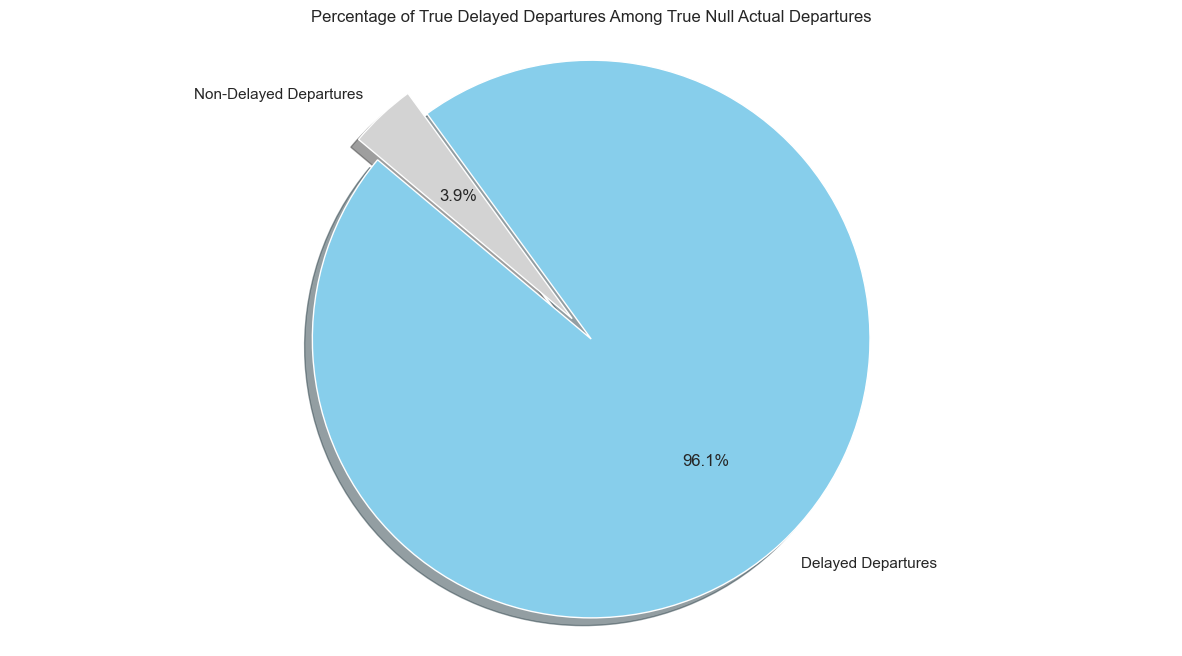

In [86]:
# Calculate the percentage of true delayed arrivals among true null actual arrivals
true_dep_delayed_count = delayed_counts2[True]
true_null_actual_departures = null_counts_actual_departure[True]
percentage2 = (true_dep_delayed_count / true_null_actual_departures) * 100

# Create a pie chart
labels = ['Delayed Departures', 'Non-Delayed Departures']
sizes = [percentage2, 100 - percentage2]  # Complement to 100%
colors = ['skyblue', 'lightgray']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of True Delayed Departures Among True Null Actual Departures")
plt.show()

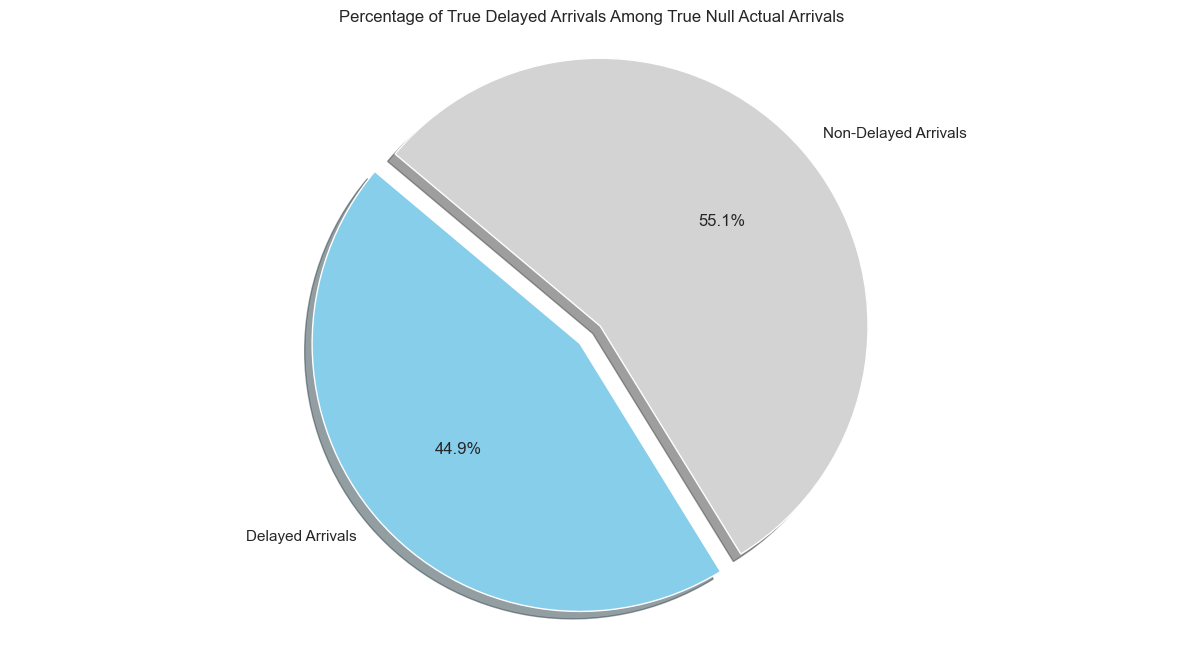

In [82]:


# Calculate the percentage of true delayed arrivals among true null actual arrivals
true_delayed_count = delayed_counts[True]
true_null_actual_arrivals = null_counts_actual_arrival[True]
percentage = (true_delayed_count / true_null_actual_arrivals) * 100

# Create a pie chart
labels = ['Delayed Arrivals', 'Non-Delayed Arrivals']
sizes = [percentage, 100 - percentage]  # Complement to 100%
colors = ['skyblue', 'lightgray']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of True Delayed Arrivals Among True Null Actual Arrivals")
plt.show()


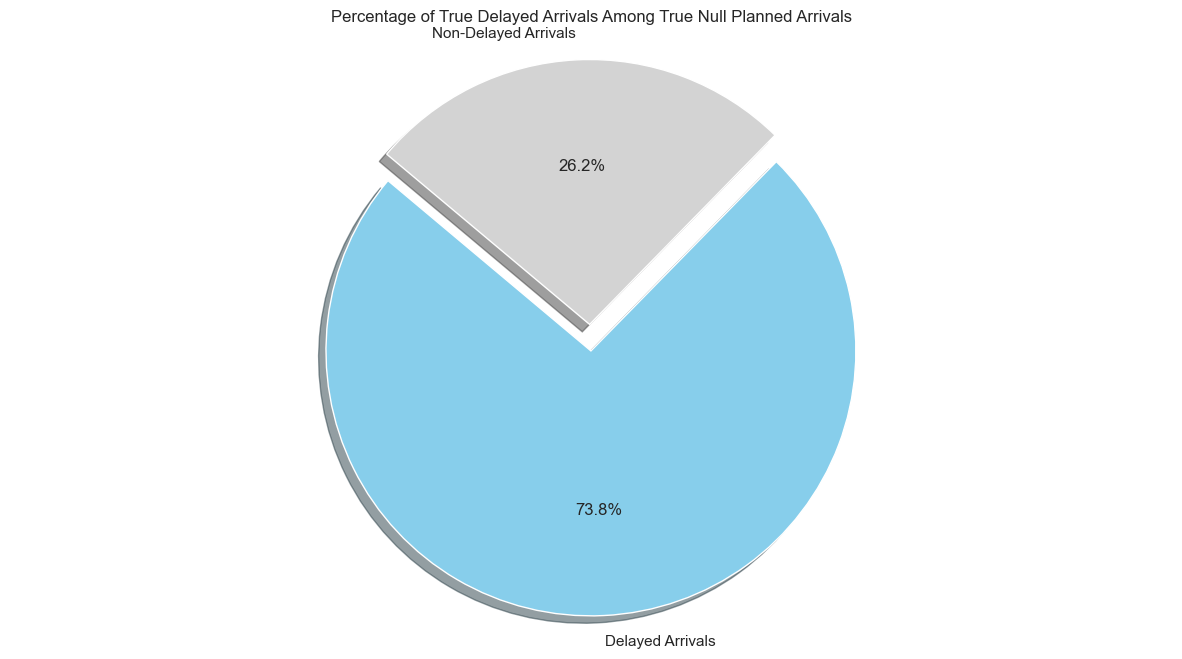

In [95]:
true_delayed_count2 = delayed_counts[True]
true_null_planned_arrivals = null_counts_planned_arrival[True]
percentage3 = (true_delayed_count2 / true_null_planned_arrivals) * 100

# Create a pie chart
labels = ['Delayed Arrivals', 'Non-Delayed Arrivals']
sizes = [percentage3, 100 - percentage3]  # Complement to 100%
colors = ['skyblue', 'lightgray']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of True Delayed Arrivals Among True Null Planned Arrivals")
plt.show()

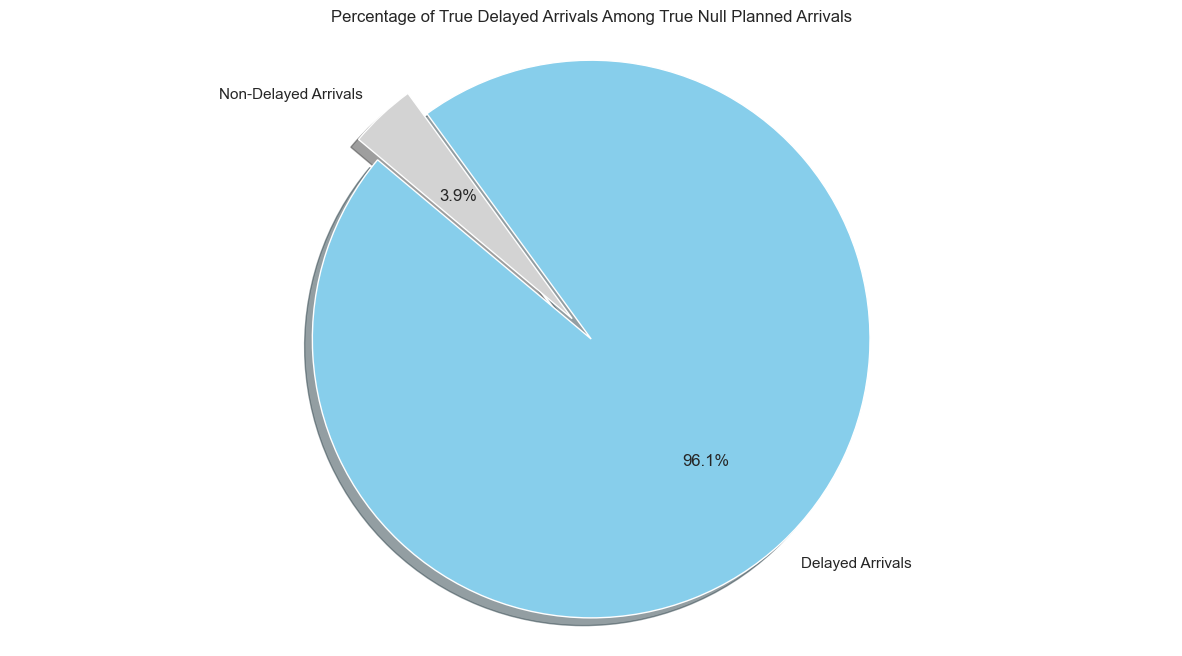

In [96]:
true_dep_delayed_count2 = delayed_counts2[True]
true_null_planned_departures = null_counts_planned_departure[True]
percentage2 = (true_dep_delayed_count / true_null_actual_departures) * 100

# Create a pie chart
labels = ['Delayed Arrivals', 'Non-Delayed Arrivals']
sizes = [percentage2, 100 - percentage2]  # Complement to 100%
colors = ['skyblue', 'lightgray']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of True Delayed Arrivals Among True Null Planned Arrivals")
plt.show()

## Route ID Y55129

In [47]:
popular_id = df[df['unique_id'] == 'Y55129']
popular_id

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,platform,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
24917,202307288955129,Y55129,2023-07-28,Trust,HDON,2023-07-28 01:11:30,2023-07-28 01:12:00,2023-07-28 01:12:00,2023-07-28 01:12:00,1,NaT,NaT,False,False
24918,202307288955129,Y55129,2023-07-28,Trust,BRENTX,2023-07-28 01:13:30,2023-07-28 01:14:00,NaT,NaT,1,2023-07-28 01:19:00,2023-07-28 01:20:00,False,False
24919,202307288955129,Y55129,2023-07-28,Trust,CRKLWD,2023-07-28 01:15:30,2023-07-28 01:17:00,2023-07-28 01:16:00,2023-07-28 01:17:00,1,2023-07-28 01:21:00,2023-07-28 01:22:00,False,False
24920,202307288955129,Y55129,2023-07-28,Trust,WHMPSTM,2023-07-28 01:20:00,2023-07-28 01:20:30,2023-07-28 01:20:00,2023-07-28 01:20:00,1,2023-07-28 01:24:00,2023-07-28 01:25:00,False,False
24922,202307288955129,Y55129,2023-07-28,Trust,KNTSHTN,2023-07-28 01:24:00,2023-07-28 01:24:30,2023-07-28 01:24:00,2023-07-28 01:24:00,1,2023-07-28 01:28:00,2023-07-28 01:29:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92756,202307288955129,Y55129,2023-07-28,Darwin,SELHRST,2023-07-28 02:02:30,2023-07-28 02:03:00,NaT,NaT,1,2023-07-28 02:04:00,2023-07-28 02:04:00,False,False
92758,202307288955129,Y55129,2023-07-28,Darwin,ECROYDN,2023-07-28 02:06:00,2023-07-28 02:07:00,2023-07-28 02:06:00,2023-07-28 02:07:00,5,2023-07-28 02:06:00,2023-07-28 02:07:00,False,False
92761,202307288955129,Y55129,2023-07-28,Darwin,PURLEY,2023-07-28 02:12:00,2023-07-28 02:13:00,2023-07-28 02:12:00,2023-07-28 02:13:00,2,2023-07-28 02:12:00,2023-07-28 02:13:00,False,False
92768,202307288955129,Y55129,2023-07-28,Darwin,HORLEY,2023-07-28 02:25:30,2023-07-28 02:26:00,2023-07-28 02:26:00,2023-07-28 02:26:00,2,2023-07-28 02:26:00,2023-07-28 02:26:00,False,False


In [48]:
agg_functions = {
    'actual_arrival_time': 'min',
    'actual_departure_time': 'max'
}

id_and_platform = popular_id.groupby(['unique_id', 'train_platform', 'service_start_date']).agg(agg_functions)

In [49]:
id_and_platform

actual_arrival_time  \
unique_id train_platform service_start_date                       
Y55129    BLFR           2023-07-28         2023-07-28 01:39:00   
          BRENTX         2023-07-28         2023-07-28 01:15:00   
          CRKLWD         2023-07-28         2023-07-28 01:16:00   
          ECROYDN        2023-07-28         2023-07-28 02:06:00   
          ELTR           2023-07-28         2023-07-28 01:06:00   
          FLITWCK        2023-07-28         2023-07-28 00:27:00   
          FRNDNLT        2023-07-28         2023-07-28 01:36:00   
          GTWK           2023-07-28         2023-07-28 02:30:00   
          HDON           2023-07-28         2023-07-28 01:12:00   
          HORLEY         2023-07-28         2023-07-28 02:26:00   
          HRLG           2023-07-28         2023-07-28 00:31:00   
          HRPNDN         2023-07-28         2023-07-28 00:49:00   
          KNTSHTN        2023-07-28         2023-07-28 01:24:00   
          LEAGRVE        2023-07-28         2023-07-28 00:37:00   
          LUTOAPY        2023-07-28         2023-07-28 00:43:00   
          LUTON          2023-07-28         2023-07-28 00:43:00   
          MLHB           2023-07-28         2023-07-28 01:08:00   
          PURLEY         2023-07-28         2023-07-28 02:12:00   
          RADLETT        2023-07-28         2023-07-28 01:01:00   
          SELHRST        2023-07-28         2023-07-28 02:03:00   
          STALBCY        2023-07-28         2023-07-28 00:55:00   
          STPXBOX        2023-07-28         2023-07-28 01:30:00   
          WHMPSTM        2023-07-28         2023-07-28 01:20:00   

                                            actual_departure_time  
unique_id train_platform service_start_date                        
Y55129    BLFR           2023-07-28           2023-07-28 01:43:00  
          BRENTX         2023-07-28           2023-07-28 01:21:00  
          CRKLWD         2023-07-28           2023-07-28 01:23:00  
          ECROYDN        2023-07-28           2023-07-28 02:14:00  
          ELTR           2023-07-28           2023-07-28 01:10:00  
          FLITWCK        2023-07-28           2023-07-28 00:27:00  
          FRNDNLT        2023-07-28           2023-07-28 01:40:00  
          GTWK           2023-07-28           2023-07-28 02:38:00  
          HDON           2023-07-28           2023-07-28 01:19:00  
          HORLEY         2023-07-28           2023-07-28 02:33:00  
          HRLG           2023-07-28           2023-07-28 00:31:00  
          HRPNDN         2023-07-28           2023-07-28 00:53:00  
          KNTSHTN        2023-07-28           2023-07-28 01:30:00  
          LEAGRVE        2023-07-28           2023-07-28 00:41:00  
          LUTOAPY        2023-07-28           2023-07-28 00:47:00  
          LUTON          2023-07-28           2023-07-28 00:45:00  
          MLHB           2023-07-28           2023-07-28 01:13:00  
          PURLEY         2023-07-28           2023-07-28 02:20:00  
          RADLETT        2023-07-28           2023-07-28 01:06:00  
          SELHRST        2023-07-28           2023-07-28 02:06:00  
          STALBCY        2023-07-28           2023-07-28 01:01:00  
          STPXBOX        2023-07-28           2023-07-28 01:35:00  
          WHMPSTM        2023-07-28           2023-07-28 01:26:00

In [50]:
aggregated = popular_id.groupby(['unique_id', 'train_platform']).agg({
    'update_origin': 'first',
    'service_start_date': 'first',
    'working_time_arrival': 'first',
    'working_time_departure': 'first',
    'actual_arrival_time': 'first',
    'actual_departure_time': 'first',
    'is_delayed_arrival': 'any'  # Use 'any' to check if any value is True in the group
}).reset_index()


In [51]:
aggregated

,unique_id,train_platform,update_origin,service_start_date,working_time_arrival,working_time_departure,actual_arrival_time,actual_departure_time,is_delayed_arrival
0,Y55129,BLFR,Trust,2023-07-28,2023-07-28 01:39:00,2023-07-28 01:40:00,2023-07-28 01:41:00,2023-07-28 01:42:00,False
1,Y55129,BRENTX,Trust,2023-07-28,2023-07-28 01:13:30,2023-07-28 01:14:00,2023-07-28 01:19:00,2023-07-28 01:20:00,False
2,Y55129,CRKLWD,Trust,2023-07-28,2023-07-28 01:15:30,2023-07-28 01:17:00,2023-07-28 01:21:00,2023-07-28 01:22:00,False
3,Y55129,ECROYDN,Trust,2023-07-28,2023-07-28 02:06:00,2023-07-28 02:07:00,2023-07-28 02:08:00,2023-07-28 02:09:00,False
4,Y55129,ELTR,Darwin,2023-07-28,2023-07-28 01:04:00,2023-07-28 01:04:30,2023-07-28 01:06:00,2023-07-28 01:07:00,False
5,Y55129,FLITWCK,TD,2023-07-28,2023-07-28 00:25:30,2023-07-28 00:26:00,2023-07-28 00:27:00,2023-07-28 00:27:00,False
6,Y55129,FRNDNLT,Trust,2023-07-28,2023-07-28 01:35:30,2023-07-28 01:36:30,2023-07-28 01:38:00,2023-07-28 01:39:00,False
7,Y55129,GTWK,Trust,2023-07-28,2023-07-28 02:29:30,2023-07-28 02:31:30,2023-07-28 02:32:00,2023-07-28 02:33:00,False
8,Y55129,HDON,Trust,2023-07-28,2023-07-28 01:11:30,2023-07-28 01:12:00,2023-07-28 01:12:00,2023-07-28 01:14:00,False
9,Y55129,HORLEY,Trust,2023-07-28,2023-07-28 02:25:30,2023-07-28 02:26:00,2023-07-28 02:28:00,2023-07-28 02:28:00,False


In [52]:
grouped = popular_id.groupby(['unique_id', 'train_platform']).platform.count()

In [53]:
grouped

unique_id  train_platform
Y55129     BLFR              5
           BRENTX            7
           CRKLWD            6
           ECROYDN           6
           ELTR              5
           FLITWCK           2
           FRNDNLT           5
           GTWK              6
           HDON              7
           HORLEY            6
           HRLG              2
           HRPNDN            4
           KNTSHTN           7
           LEAGRVE           4
           LUTOAPY           4
           LUTON             3
           MLHB              5
           PURLEY            6
           RADLETT           5
           SELHRST           6
           STALBCY           6
           STPXBOX           6
           WHMPSTM           7
Name: platform, dtype: int64